Consider the update rule:

$$ \min_{\Delta x \in \mathcal{X}} \Delta x^{\top} \nabla_x f +\frac{\alpha}{\eta} \Delta x^{\top} \nabla_{xy}^2 f\Delta y + \Delta y^{\top} \nabla_y f+ \frac{1}{2\eta} \|\Delta x\|_p^p $$

$$\max_{\Delta y \in \mathcal{Y}}  \Delta y^{\top} \nabla_y f +\frac{\alpha}{\eta} \Delta y^{\top} \nabla_{yx}^2 f \Delta x + \Delta x^{\top} \nabla_x f - \frac{1}{2\eta} \|\Delta x\|_p^p$$

Running tests for the three implementations of the update rule.

Function f(x,y) = xy
Testing at point (x,y) = (2, 3)
Alpha = 0.5, Eta = 0.1

Gradients:
∇x f = 3
∇y f = 2
∇xy f = 1

M matrix:
[[ 1.   0.5]
 [-0.5  1. ]]

M^(-1) matrix:
[[ 0.8 -0.4]
 [ 0.4  0.8]]

Gradient vector F = [∇x f, -∇y f]:
[ 3 -2]

Test at (x,y) = (2, 3):
Implementation 1 (M^(-1)F): [-0.32  0.04]
Implementation 2 (sign(M^(-1))sign(F)): [-0.2  0. ]
Implementation 3 (sign(M^(-1)F)): [-0.1  0.1]
Implementation 4 (M^(-1)sign(F)): [-0.12  0.04]
Implementation 5 (Sign AGDA): [-0.1  0.1]

---------------------
Additional test cases:
---------------------

Test at (x,y) = (-1, 2):
Implementation 1 (M^(-1)F): [-0.12 -0.16]
Implementation 2 (sign(M^(-1))sign(F)): [ 0.  -0.2]
Implementation 3 (sign(M^(-1)F)): [-0.1 -0.1]
Implementation 4 (M^(-1)sign(F)): [-0.04 -0.12]
Implementation 5 (Sign AGDA): [-0.1 -0.1]

Test at (x,y) = (1, -2):
Implementation 1 (M^(-1)F): [0.12 0.16]
Implementation 2 (sign(M^(-1))sign(F)): [0.  0.2]

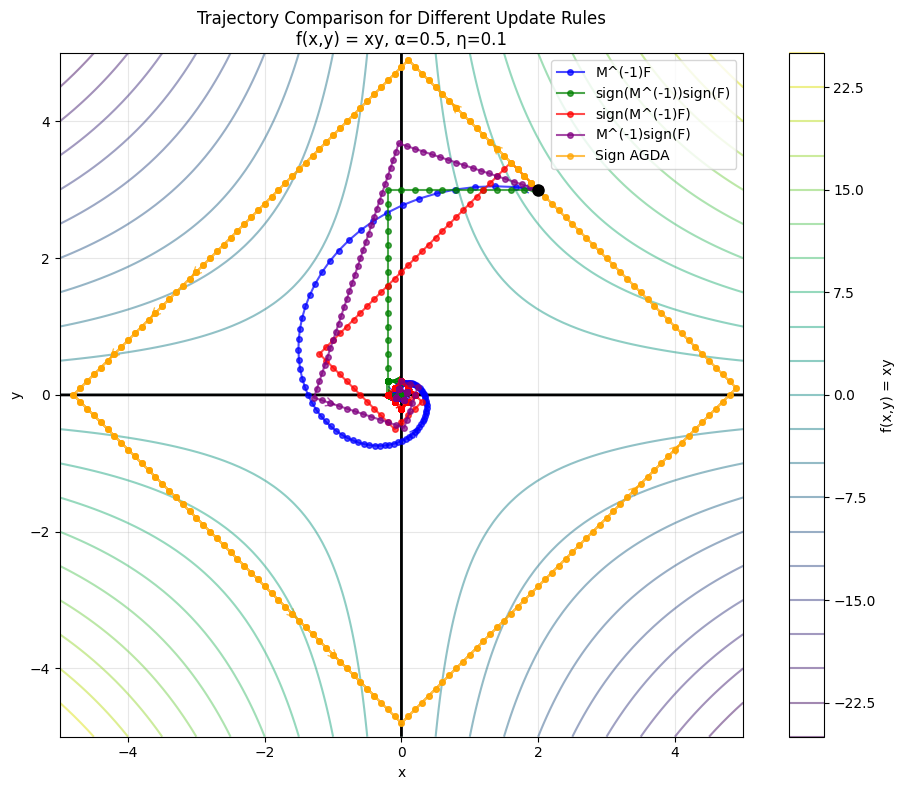

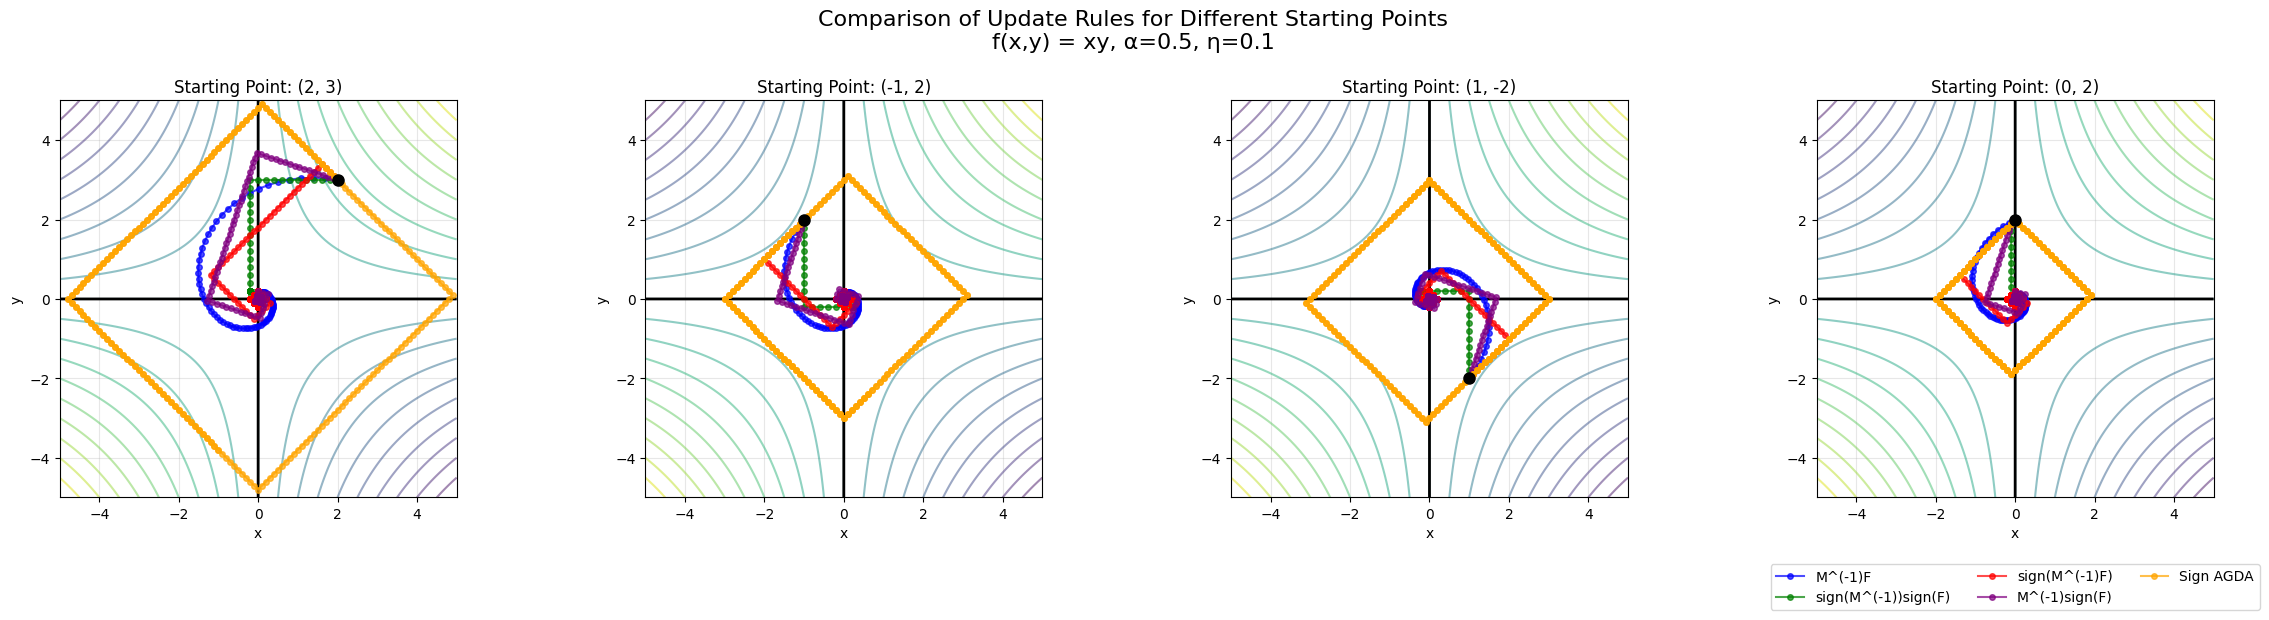

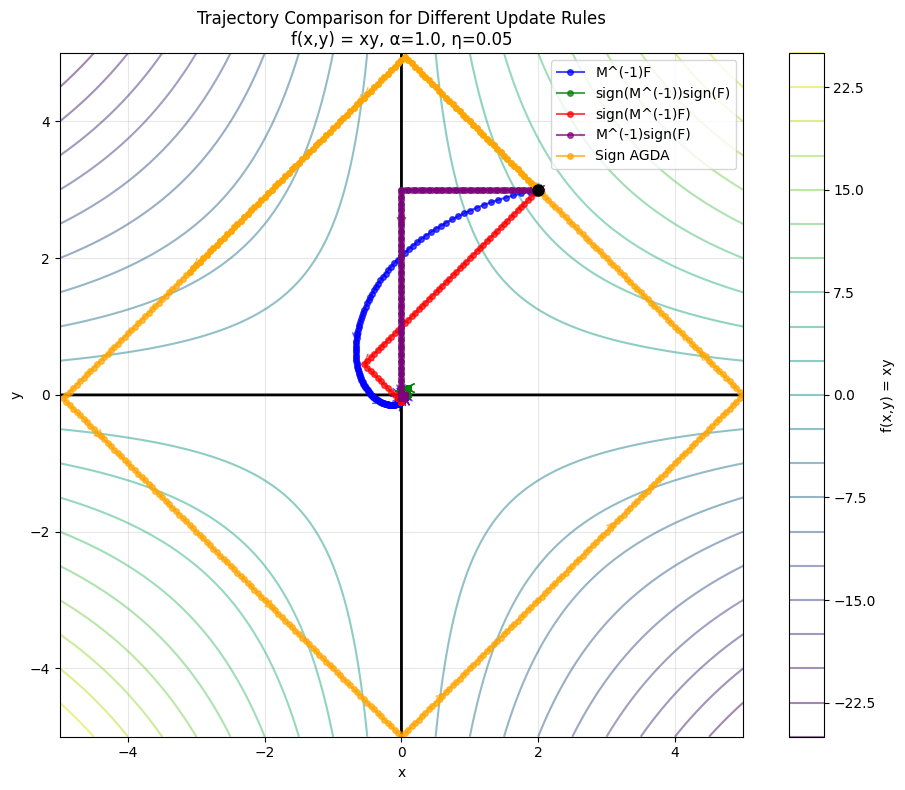

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function f(x,y) = xy
def f(x, y):
    return x * y

# Gradients
def grad_x(x, y):
    return y  # ∂f/∂x = y for f(x,y) = xy

def grad_y(x, y):
    return x  # ∂f/∂y = x for f(x,y) = xy

# Second derivatives
def grad_xy(x, y):
    return 1  # ∂²f/∂x∂y = 1 for f(x,y) = xy

def grad_yx(x, y):
    return 1  # ∂²f/∂y∂x = 1 for f(x,y) = xy (same as grad_xy due to symmetry)

# The general update rule
def update_rule(x, y, alpha, eta):
    # Construct the M matrix
    M = np.array([
        [1, alpha * grad_xy(x, y)],
        [-alpha * grad_yx(x, y), 1]
    ])
    
    # Compute M^(-1)
    M_inv = np.linalg.inv(M)
    
    # Construct the gradient vector F
    F = np.array([grad_x(x, y), -grad_y(x, y)])
    
    # Compute the update: -η * M^(-1) * F
    update = -eta * M_inv @ F
    
    return {
        'M': M,
        'M_inv': M_inv,
        'F': F,
        'update': update
    }

# First implementation: M^(-1)F directly
def implementation1(x, y, alpha, eta):
    result = update_rule(x, y, alpha, eta)
    return result['update']

# Second implementation: sign(M^(-1)) * sign(F)
def implementation2(x, y, alpha, eta):
    result = update_rule(x, y, alpha, eta)
    
    # Extract M^(-1) and F
    M_inv = result['M_inv']
    F = result['F']
    
    # Compute sign(M^(-1))
    sign_M_inv = np.sign(M_inv)
    
    # Compute sign(F)
    sign_F = np.sign(F)
    
    # Compute sign(M^(-1)) * sign(F)
    update = -eta * sign_M_inv @ sign_F
    
    return update

# Third implementation: sign(M^(-1) * F)
def implementation3(x, y, alpha, eta):
    result = update_rule(x, y, alpha, eta)
    
    # Compute M^(-1) * F without the -η factor
    M_inv_F = result['M_inv'] @ result['F']
    
    # Compute sign(M^(-1) * F)
    sign_M_inv_F = np.sign(M_inv_F)
    
    # Apply -η
    update = -eta * sign_M_inv_F
    
    return update

# Fourth implementation: M^(-1) * sign(F)
def implementation4(x, y, alpha, eta):
    result = update_rule(x, y, alpha, eta)
    
    # Extract M^(-1) and F
    M_inv = result['M_inv']
    F = result['F']
    
    # Compute sign(F)
    sign_F = np.sign(F)
    
    # Compute M^(-1) * sign(F)
    update = -eta * M_inv @ sign_F
    
    return update

# Fifth implementation: Sign AGDA (Alternating Gradient Descent Ascent)
def implementation5(x, y, alpha, eta):
    # This approach uses alternating updates with sign function
    # x_{t+1} = x_t - η * sign(∇_x f(x_t, y_t))
    # y_{t+1} = y_t - η * sign(∇_y f(x_{t+1}, y_t))
    
    # First compute the x update using current (x, y)
    delta_x = -eta * np.sign(grad_x(x, y))
    
    # Then compute the y update using updated x but original y
    # Note the negative sign for ∇_y is already incorporated in the formula
    delta_y = -eta * np.sign(-grad_y(x + delta_x, y))
    
    return np.array([delta_x, delta_y])

# Test function to run all implementations
def run_test(x, y, alpha=0.5, eta=0.1, verbose=True):
    if verbose:
        print(f"\nFunction f(x,y) = xy")
        print(f"Testing at point (x,y) = ({x}, {y})")
        print(f"Alpha = {alpha}, Eta = {eta}")
        print("\nGradients:")
        print(f"∇x f = {grad_x(x, y)}")
        print(f"∇y f = {grad_y(x, y)}")
        print(f"∇xy f = {grad_xy(x, y)}")
    
    result = update_rule(x, y, alpha, eta)
    
    if verbose:
        print("\nM matrix:")
        print(result['M'])
        print("\nM^(-1) matrix:")
        print(result['M_inv'])
        print("\nGradient vector F = [∇x f, -∇y f]:")
        print(result['F'])
    
    impl1 = implementation1(x, y, alpha, eta)
    impl2 = implementation2(x, y, alpha, eta)
    impl3 = implementation3(x, y, alpha, eta)
    impl4 = implementation4(x, y, alpha, eta)
    impl5 = implementation5(x, y, alpha, eta)
    
    print(f"\nTest at (x,y) = ({x}, {y}):")
    print(f"Implementation 1 (M^(-1)F): {impl1}")
    print(f"Implementation 2 (sign(M^(-1))sign(F)): {impl2}")
    print(f"Implementation 3 (sign(M^(-1)F)): {impl3}")
    print(f"Implementation 4 (M^(-1)sign(F)): {impl4}")
    print(f"Implementation 5 (Sign AGDA): {impl5}")
    
    return impl1, impl2, impl3, impl4, impl5

# Function to generate and plot trajectories
def plot_trajectories(start_x, start_y, alpha=0.5, eta=0.1, num_iterations=50, method_names=None):
    """
    Generate and plot trajectories for all implementations
    
    Parameters:
    -----------
    start_x, start_y : float
        Starting point coordinates
    alpha, eta : float
        Parameters for the update rule
    num_iterations : int
        Number of iterations to run
    method_names : list of str or None
        Names for the methods in the legend
    """
    if method_names is None:
        method_names = ['M^(-1)F', 'sign(M^(-1))sign(F)', 'sign(M^(-1)F)', 'M^(-1)sign(F)', 'Sign AGDA']
    
    # Implementation functions
    implementations = [implementation1, implementation2, implementation3, implementation4, implementation5]
    
    # Colors for each implementation
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create contour plot of the function f(x,y) = xy
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)
    
    # Plot contours of the function
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)
    plt.colorbar(contour, ax=ax, label='f(x,y) = xy')
    
    # Highlight the zero level contour
    ax.contour(X, Y, Z, levels=[0], colors='black', linewidths=2)
    
    # Generate and plot trajectories for each implementation
    for i, implementation in enumerate(implementations):
        # Initialize trajectory storage
        trajectory_x = [start_x]
        trajectory_y = [start_y]
        
        # Current position
        x, y = start_x, start_y
        
        # Run iterations
        for _ in range(num_iterations):
            # Get update
            delta = implementation(x, y, alpha, eta)
            
            # Update position
            x += delta[0]
            y += delta[1]
            
            # Store current position
            trajectory_x.append(x)
            trajectory_y.append(y)
        
        # Plot trajectory
        ax.plot(trajectory_x, trajectory_y, '-o', color=colors[i], label=method_names[i], 
                markersize=4, linewidth=1.5, alpha=0.7)
        
        # Add arrow to indicate direction
        for j in range(0, len(trajectory_x)-1, max(1, num_iterations//10)):
            ax.add_patch(FancyArrowPatch(
                (trajectory_x[j], trajectory_y[j]),
                (trajectory_x[j+1], trajectory_y[j+1]),
                arrowstyle='->', color=colors[i], alpha=0.7,
                mutation_scale=15
            ))
    
    # Set plot title and labels
    ax.set_title(f'Trajectory Comparison for Different Update Rules\nf(x,y) = xy, α={alpha}, η={eta}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)
    
    # Add legend
    ax.legend()
    
    # Show starting point
    ax.plot(start_x, start_y, 'ko', markersize=8, label='Start')
    
    # Set equal aspect ratio
    ax.set_aspect('equal')
    
    # Auto adjust plot limits
    max_range = max(
        max(abs(min(x_range)), abs(max(x_range))),
        max(abs(min(y_range)), abs(max(y_range)))
    )
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    
    plt.tight_layout()
    return fig

# Function to compare multiple starting points
def compare_starting_points(starting_points, alpha=0.5, eta=0.1, num_iterations=30):
    """
    Compare trajectories from multiple starting points
    
    Parameters:
    -----------
    starting_points : list of tuples
        List of (x, y) starting coordinates
    alpha, eta : float
        Parameters for the update rule
    num_iterations : int
        Number of iterations to run
    """
    # Create figure with subplots
    fig, axes = plt.subplots(1, len(starting_points), figsize=(6*len(starting_points), 6))
    
    # If only one starting point, wrap the axis in a list
    if len(starting_points) == 1:
        axes = [axes]
    
    # Colors for each implementation
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    method_names = ['M^(-1)F', 'sign(M^(-1))sign(F)', 'sign(M^(-1)F)', 'M^(-1)sign(F)', 'Sign AGDA']
    
    # Create contour data for the function f(x,y) = xy
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)
    
    # Plot for each starting point
    for i, (start_x, start_y) in enumerate(starting_points):
        ax = axes[i]
        
        # Plot contours
        contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)
        
        # Highlight the zero level contour
        ax.contour(X, Y, Z, levels=[0], colors='black', linewidths=2)
        
        # Plot trajectories for each implementation
        for j, implementation_func in enumerate([implementation1, implementation2, implementation3, implementation4, implementation5]):
            # Initialize trajectory
            trajectory_x = [start_x]
            trajectory_y = [start_y]
            
            # Current position
            x, y = start_x, start_y
            
            # Run iterations
            for _ in range(num_iterations):
                # Get update
                delta = implementation_func(x, y, alpha, eta)
                
                # Update position
                x += delta[0]
                y += delta[1]
                
                # Store current position
                trajectory_x.append(x)
                trajectory_y.append(y)
            
            # Plot trajectory
            ax.plot(trajectory_x, trajectory_y, '-o', color=colors[j], 
                    label=method_names[j], markersize=4, linewidth=1.5, alpha=0.7)
        
        # Show starting point
        ax.plot(start_x, start_y, 'ko', markersize=8)
        
        # Set title and labels
        ax.set_title(f'Starting Point: ({start_x}, {start_y})')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid(True, alpha=0.3)
        
        # Set equal aspect ratio
        ax.set_aspect('equal')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
    
    # Add legend to the last subplot
    axes[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    
    # Add a common title
    fig.suptitle(f'Comparison of Update Rules for Different Starting Points\nf(x,y) = xy, α={alpha}, η={eta}', 
                 fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return fig

# Main test function
def main():
    print("Running tests for the three implementations of the update rule.")
    
    # Primary test case
    primary_x, primary_y = 2, 3
    run_test(primary_x, primary_y)
    
    # Additional test cases
    test_cases = [
        (-1, 2),  # Different signs
        (1, -2),  # Different signs reversed
        (0, 2),   # Zero in one coordinate
    ]
    
    print("\n---------------------")
    print("Additional test cases:")
    print("---------------------")
    
    for x, y in test_cases:
        run_test(x, y, verbose=False)
    
    # Generate and save trajectory plots
    print("\n---------------------")
    print("Generating trajectory plots...")
    print("---------------------")
    
    # Plot trajectory from the primary test case
    fig1 = plot_trajectories(primary_x, primary_y, num_iterations=500)
    plt.savefig("trajectory_comparison_primary.png", dpi=300, bbox_inches='tight')
    
    # Compare trajectories from multiple starting points
    starting_points = [(2, 3), (-1, 2), (1, -2), (0, 2)]
    fig2 = compare_starting_points(starting_points, num_iterations=300)
    plt.savefig("trajectory_comparison_multiple_points.png", dpi=300, bbox_inches='tight')
    
    # Generate plots with different parameters
    fig3 = plot_trajectories(2, 3, alpha=1.0, eta=0.05, num_iterations=500)
    plt.savefig("trajectory_comparison_alt_params.png", dpi=300, bbox_inches='tight')
    
    print("Plots generated. Run the script to view the plots.")
    
    # Show all plots (comment this out when not running interactively)
    plt.show()

if __name__ == "__main__":
    main()

Initialized saddle point game with f(x,y) = x²-y²+xy

Function f(x,y) = x²-y²+xy
Testing at point x = 1.0, y = 1.0
Eta = 0.1

Gradients:
∇x f = 3.0
∇y f = -1.0
f(x, y) = 1.0

Test at x = 1.0, y = 1.0:
AGDA: dx = -0.30000000000000004, dy = -0.13
Sign AGDA: dx = -0.1, dy = -0.1

Generating (x,y) iterate plots for offset_positive starting point...

Generating (x,y) iterate plots for mixed_signs1 starting point...

Generating (x,y) iterate plots for mixed_signs2 starting point...

Generating (x,y) iterate plots for offset_negative starting point...

Generating (x,y) iterate plots for x_axis starting point...

Generating (x,y) iterate plots for y_axis starting point...

Generating (x,y) iterate plots with eta=0.01...

Generating (x,y) iterate plots with eta=0.05...

Generating (x,y) iterate plots with eta=0.1...

Generating (x,y) iterate plots with eta=0.2...

All examples completed and plots saved.


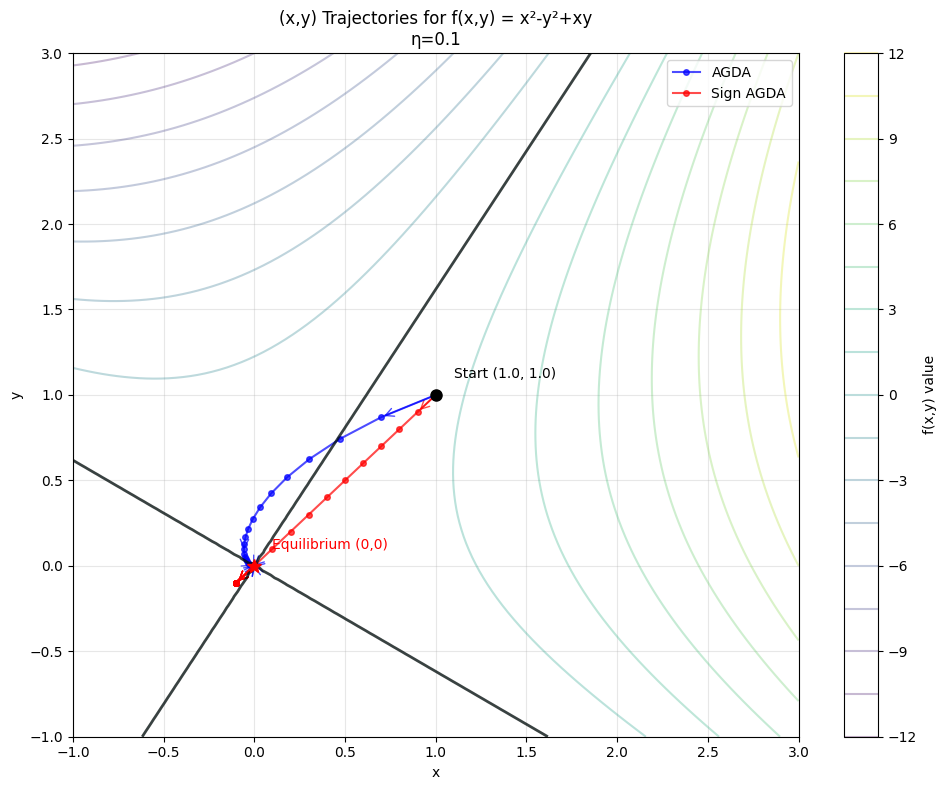

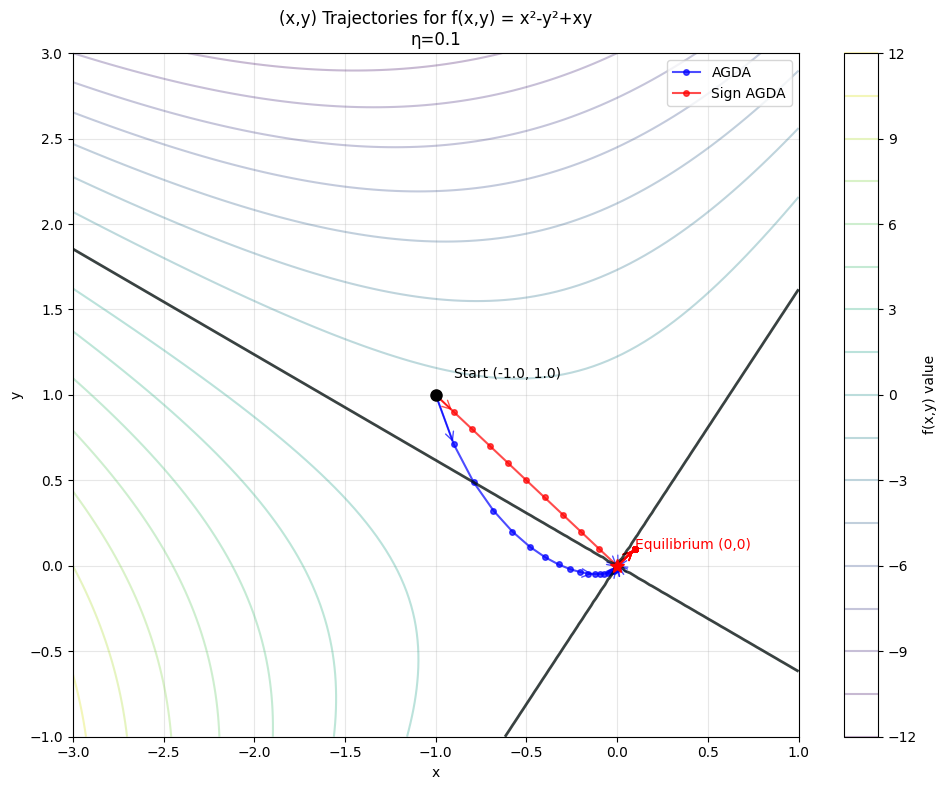

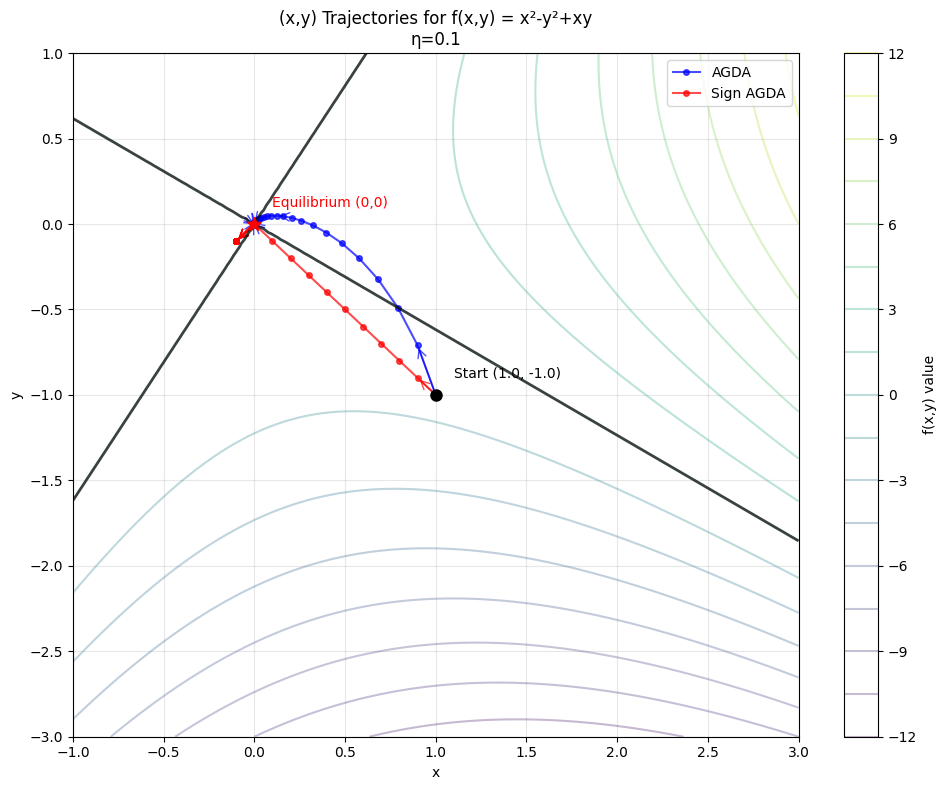

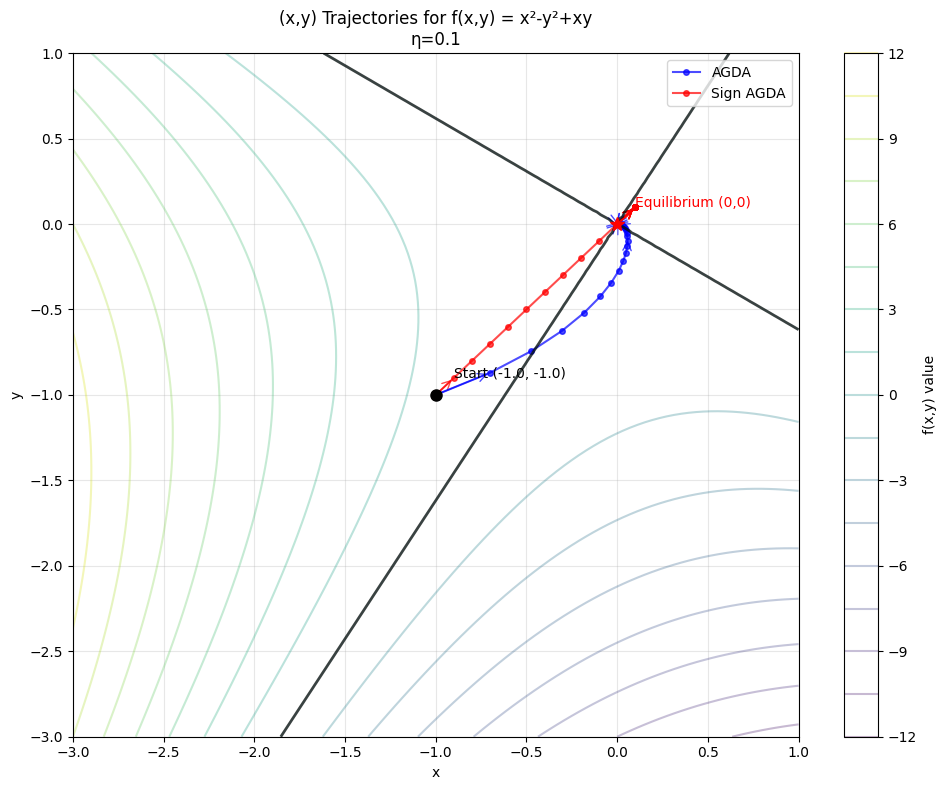

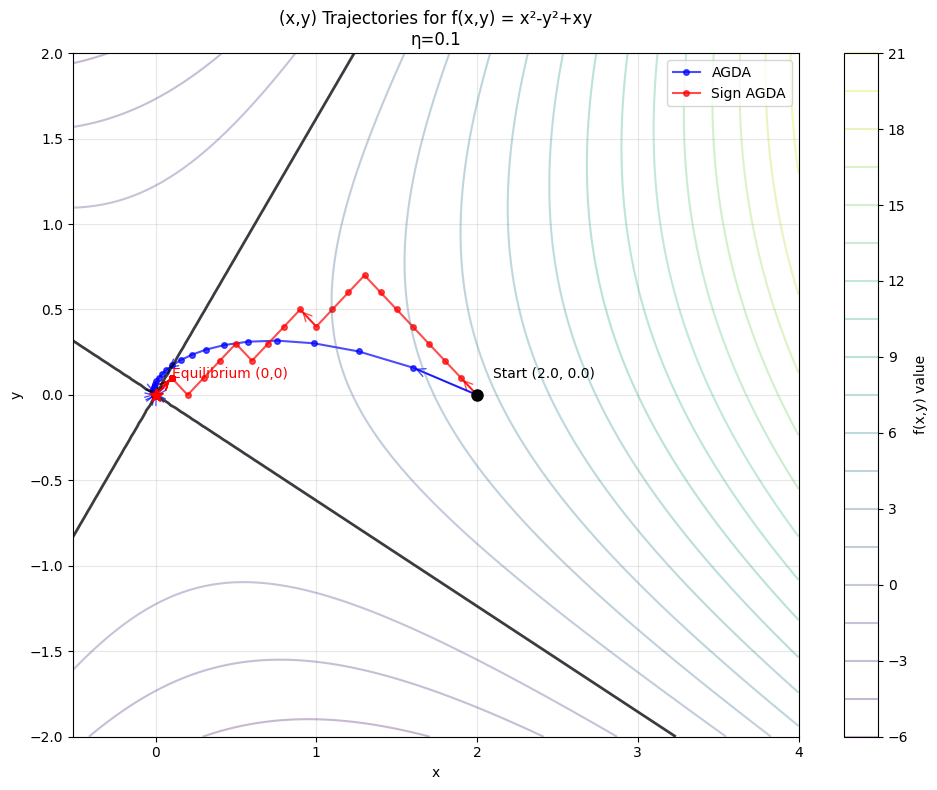

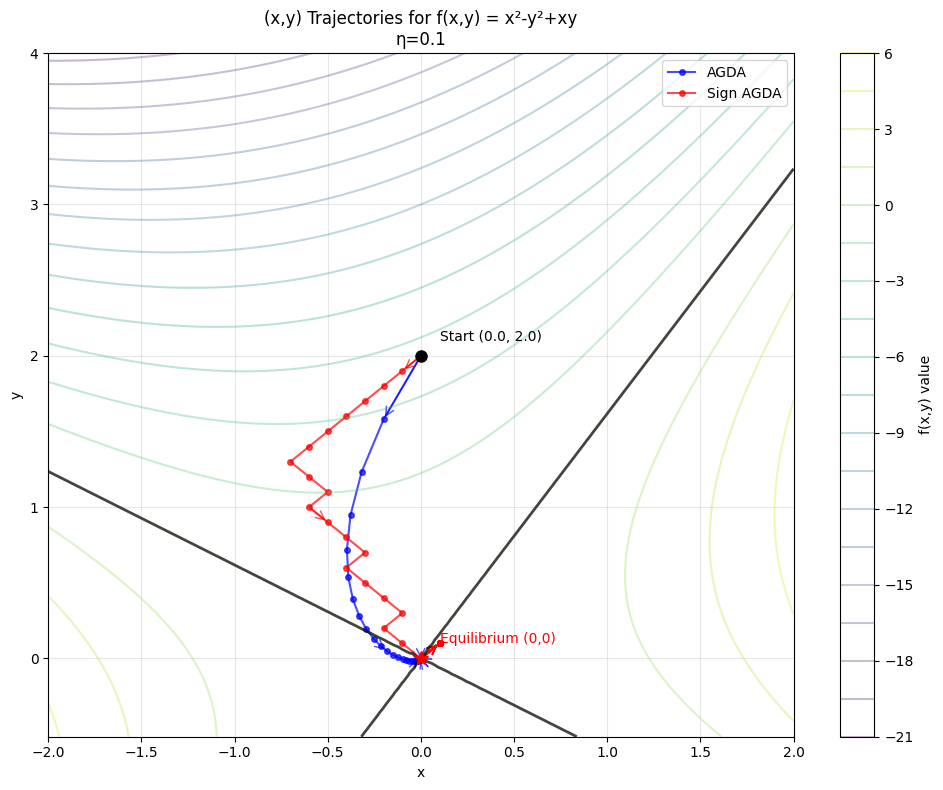

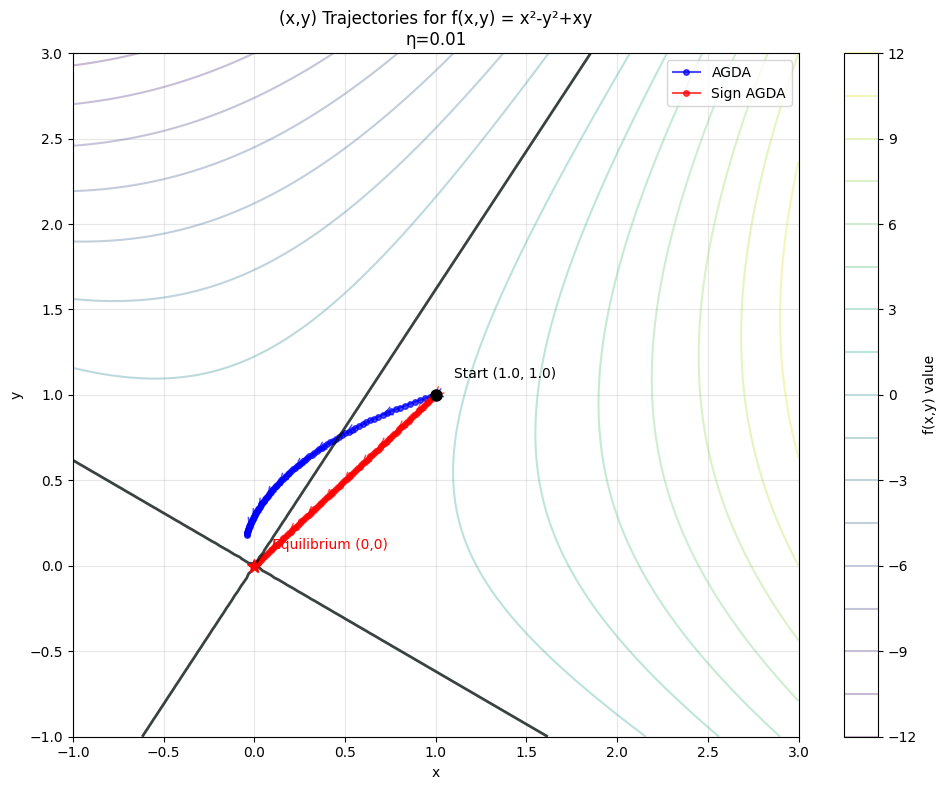

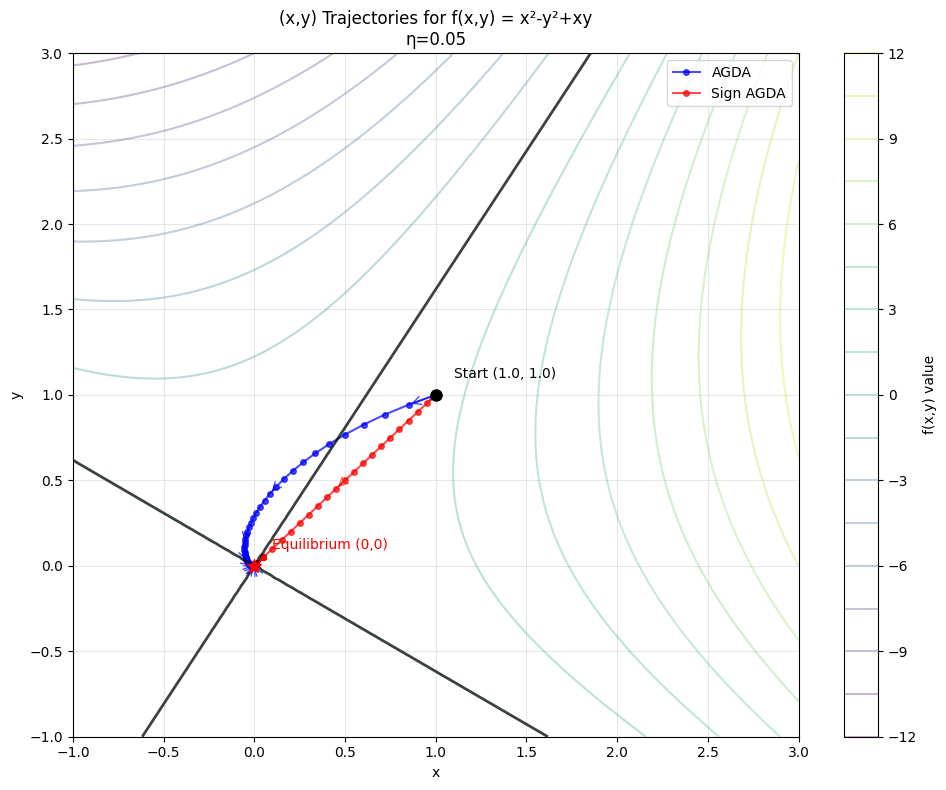

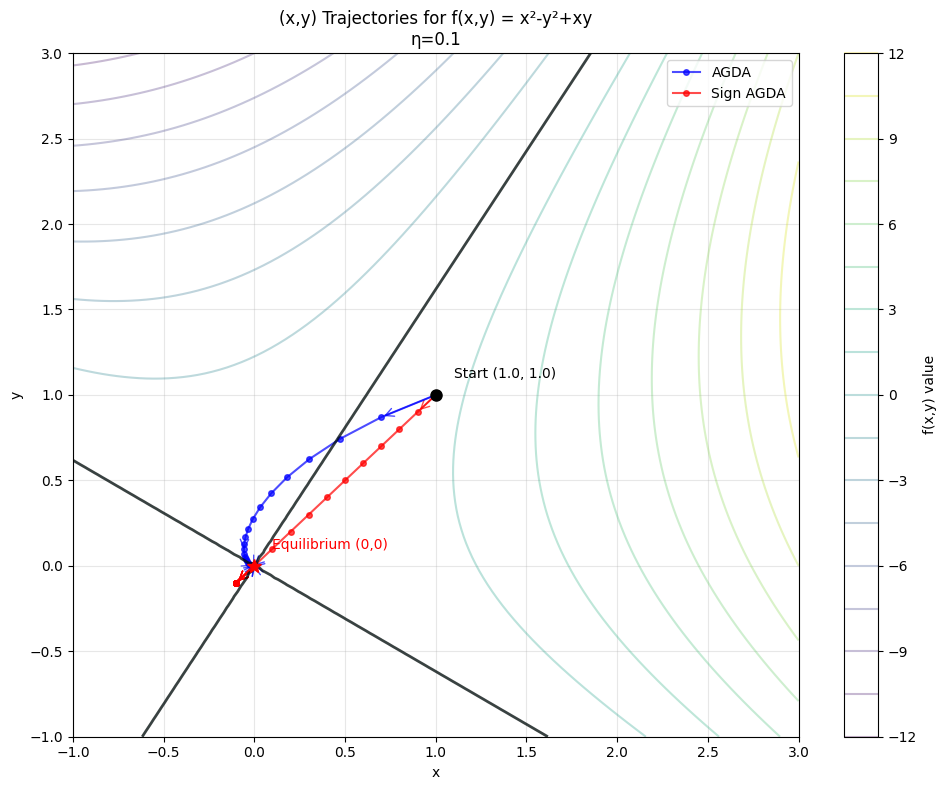

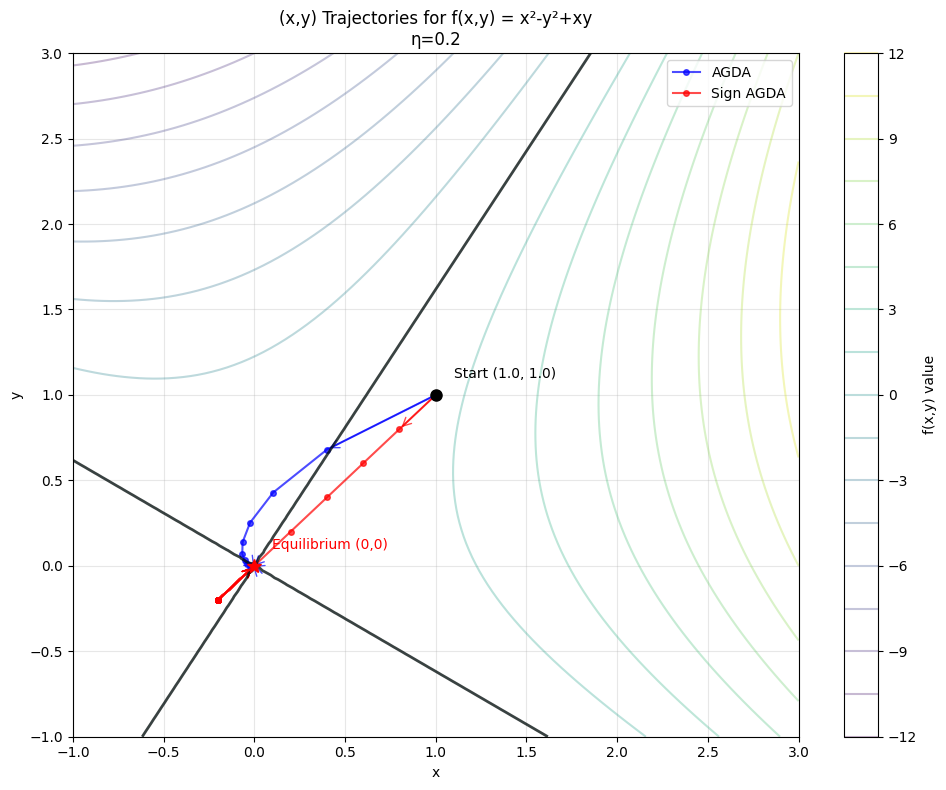

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

class SaddlePointGame:
    """
    Class to handle the saddle point game with f(x,y) = x²-y²+xy
    where x and y are scalars
    """
    def __init__(self):
        """Initialize the saddle point game"""
        print("Initialized saddle point game with f(x,y) = x²-y²+xy")
    
    def f(self, x, y):
        """Compute the function f(x,y) = x²-y²+xy"""
        return x**2 - y**2 + x*y
    
    def grad_x(self, x, y):
        """Compute gradient with respect to x: ∇_x f(x,y) = 2x+y"""
        return 2 * x + y
    
    def grad_y(self, x, y):
        """Compute gradient with respect to y: ∇_y f(x,y) = -2y+x"""
        return -2 * y + x
    
    def implementation_agda(self, x, y, eta=0.1):
        """
        Implementation of AGDA (Alternating Gradient Descent Ascent)
        x_{t+1} = x_t - η * ∇_x f(x_t, y_t)
        y_{t+1} = y_t + η * ∇_y f(x_{t+1}, y_t)
        
        Gradient descent for x, gradient ascent for y.
        """
        # First compute the x update using current (x, y)
        grad_x_val = self.grad_x(x, y)
        delta_x = -eta * grad_x_val
        
        # Then compute the y update using updated x but original y
        x_new = x + delta_x
        grad_y_val = self.grad_y(x_new, y)
        delta_y = eta * grad_y_val  # Note the + sign for ascent
        
        return delta_x, delta_y
    
    def implementation_sign_agda(self, x, y, eta=0.1):
        """
        Implementation of Sign AGDA (Alternating Gradient Descent Ascent with sign function)
        x_{t+1} = x_t - η * sign(∇_x f(x_t, y_t))
        y_{t+1} = y_t + η * sign(∇_y f(x_{t+1}, y_t))
        
        Sign gradient descent for x, sign gradient ascent for y.
        """
        # First compute the x update using current (x, y)
        grad_x_val = self.grad_x(x, y)
        delta_x = -eta * np.sign(grad_x_val)
        
        # Then compute the y update using updated x but original y
        x_new = x + delta_x
        grad_y_val = self.grad_y(x_new, y)
        delta_y = eta * np.sign(grad_y_val)  # Note the + sign for ascent
        
        return delta_x, delta_y
    
    def run_test(self, x, y, eta=0.1, verbose=True):
        """
        Test AGDA and Sign AGDA at a given point
        
        Parameters:
        -----------
        x, y : float
            Test position
        eta : float
            Learning rate
        verbose : bool
            Whether to print detailed output
            
        Returns:
        --------
        List of (update_x, update_y) for each implementation
        """
        if verbose:
            print(f"\nFunction f(x,y) = x²-y²+xy")
            print(f"Testing at point x = {x}, y = {y}")
            print(f"Eta = {eta}")
            print("\nGradients:")
            print(f"∇x f = {self.grad_x(x, y)}")
            print(f"∇y f = {self.grad_y(x, y)}")
            print(f"f(x, y) = {self.f(x, y)}")
        
        # Call each implementation
        impl1 = self.implementation_agda(x, y, eta=eta)
        impl2 = self.implementation_sign_agda(x, y, eta=eta)
        
        # Print results
        print(f"\nTest at x = {x}, y = {y}:")
        print(f"AGDA: dx = {impl1[0]}, dy = {impl1[1]}")
        print(f"Sign AGDA: dx = {impl2[0]}, dy = {impl2[1]}")
        
        return [impl1, impl2]
    
    def plot_2d_iterates(self, start_x, start_y, eta=0.1, num_iterations=100):
        """
        Generate and plot 2D iterates for AGDA and Sign AGDA
        
        Parameters:
        -----------
        start_x, start_y : float
            Starting position
        eta : float
            Learning rate
        num_iterations : int
            Number of iterations to run
            
        Returns:
        --------
        matplotlib figure
        """
        method_names = ['AGDA', 'Sign AGDA']
        
        # Implementation functions
        implementations = [
            self.implementation_agda,
            self.implementation_sign_agda
        ]
        
        # Colors for each implementation
        colors = ['blue', 'red']
        
        # Create figure and axis for phase space
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Prepare for trajectory storage
        all_x_trajectories = []
        all_y_trajectories = []
        
        # For each implementation
        for i, implementation in enumerate(implementations):
            # Initialize trajectory storage
            x, y = start_x, start_y
            
            # Lists to store trajectory points
            x_trajectory = [x]
            y_trajectory = [y]
            
            # Run iterations
            for iter_num in range(num_iterations):
                # Get update
                delta_x, delta_y = implementation(x, y, eta=eta)
                
                # Update position
                x += delta_x
                y += delta_y
                
                # Store current position
                x_trajectory.append(x)
                y_trajectory.append(y)
                
                # Check for convergence or divergence
                if np.abs(x) > 1e6 or np.abs(y) > 1e6 or np.isnan(x) or np.isnan(y):
                    print(f"{method_names[i]} diverged after {iter_num+1} iterations")
                    break
            
            # Store trajectories for contour plot boundaries
            all_x_trajectories.extend(x_trajectory)
            all_y_trajectories.extend(y_trajectory)
            
            # Plot phase space trajectory (x vs y)
            ax.plot(x_trajectory, y_trajectory, '-o', color=colors[i], 
                   label=method_names[i], markersize=4, linewidth=1.5, alpha=0.7)
            
            # Add arrows to indicate direction on phase plot
            arrow_spacing = max(1, num_iterations//10)
            for j in range(0, len(x_trajectory)-1, arrow_spacing):
                ax.add_patch(FancyArrowPatch(
                    (x_trajectory[j], y_trajectory[j]),
                    (x_trajectory[j+1], y_trajectory[j+1]),
                    arrowstyle='->', color=colors[i], alpha=0.7,
                    mutation_scale=15
                ))
        
        # Set axis labels and title for phase space plot
        ax.set_title(f'(x,y) Trajectories for f(x,y) = x²-y²+xy\nη={eta}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Show starting point
        ax.plot(start_x, start_y, 'ko', markersize=8)
        ax.text(start_x + 0.1, start_y + 0.1, f'Start ({start_x}, {start_y})', fontsize=10)
        
        # Add contour lines to phase plot for better visualization
        # Determine plot boundaries based on trajectories
        x_values = np.array(all_x_trajectories)
        y_values = np.array(all_y_trajectories)
        
        # Filter out any infinite or NaN values
        x_values = x_values[np.isfinite(x_values)]
        y_values = y_values[np.isfinite(y_values)]
        
        if len(x_values) > 0 and len(y_values) > 0:
            x_min = min(np.min(x_values) - 0.5, start_x - 2)
            x_max = max(np.max(x_values) + 0.5, start_x + 2)
            y_min = min(np.min(y_values) - 0.5, start_y - 2)
            y_max = max(np.max(y_values) + 0.5, start_y + 2)
        else:
            # Default boundaries if all trajectories diverged
            x_min, x_max = start_x - 2, start_x + 2
            y_min, y_max = start_y - 2, start_y + 2
        
        # Ensure plot is not too zoomed out
        max_range = max(x_max - x_min, y_max - y_min)
        if max_range > 10:
            center_x = (x_min + x_max) / 2
            center_y = (y_min + y_max) / 2
            x_min = center_x - 5
            x_max = center_x + 5
            y_min = center_y - 5
            y_max = center_y + 5
        
        # Create contour plot
        x_range = np.linspace(x_min, x_max, 100)
        y_range = np.linspace(y_min, y_max, 100)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.zeros_like(X)
        
        for i in range(len(x_range)):
            for j in range(len(y_range)):
                Z[j, i] = self.f(X[j, i], Y[j, i])
        
        # Plot contours
        contours = ax.contour(X, Y, Z, 20, cmap='viridis', alpha=0.3)
        plt.colorbar(contours, ax=ax, label='f(x,y) value')
        
        # Plot the zero level contour with a different color
        ax.contour(X, Y, Z, levels=[0], colors='black', linewidths=2, alpha=0.7)
        
        # Add equilibrium point at (0,0)
        equilibrium_x, equilibrium_y = 0, 0
        if x_min <= equilibrium_x <= x_max and y_min <= equilibrium_y <= y_max:
            ax.plot(equilibrium_x, equilibrium_y, 'r*', markersize=10)
            ax.text(equilibrium_x + 0.1, equilibrium_y + 0.1, 'Equilibrium (0,0)', color='red', fontsize=10)
        
        plt.tight_layout()
        return fig

def visualize_agda_on_saddle_point():
    """Visualize AGDA and Sign AGDA on the saddle point function f(x,y) = x²-y²+xy"""
    # Initialize the game
    game = SaddlePointGame()
    
    # Test at different starting points
    test_points = [
        (1.0, 1.0, "offset_positive"),
        (-1.0, 1.0, "mixed_signs1"),
        (1.0, -1.0, "mixed_signs2"),
        (-1.0, -1.0, "offset_negative"),
        (2.0, 0.0, "x_axis"),
        (0.0, 2.0, "y_axis")
    ]
    
    # Just run one quick test to see the update directions
    game.run_test(1.0, 1.0)
    
    # Plot 2D iterates for selected starting points
    for x, y, label in test_points:
        print(f"\nGenerating (x,y) iterate plots for {label} starting point...")
        fig = game.plot_2d_iterates(x, y)
        plt.savefig(f"saddle_xy_iterates_{label}.png", dpi=300, bbox_inches='tight')
    
    # Different eta values at the same starting point
    start_x, start_y = 1.0, 1.0
    eta_values = [0.01, 0.05, 0.1, 0.2]
    for eta in eta_values:
        print(f"\nGenerating (x,y) iterate plots with eta={eta}...")
        fig = game.plot_2d_iterates(start_x, start_y, eta=eta)
        plt.savefig(f"saddle_xy_iterates_eta_{eta}.png", dpi=300, bbox_inches='tight')
    
    print("\nAll examples completed and plots saved.")
    
    # Show plots if running interactively
    plt.show()

if __name__ == "__main__":
    visualize_agda_on_saddle_point()